### Rain Prediction in Austrelia

This dataset contains about 10 years of daily weather observations from many locations across Australia.


RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'weatherAUS.csv')

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.shape

(145460, 23)

In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
data.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [9]:
# Check Missing values

In [10]:
data.isnull().sum()   # there are lots of missing values in the data set

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
# Check Duplicates

In [12]:
data.duplicated().sum()

0

In [13]:
# Check the number of unique values of each column

In [14]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

## EDA

In [15]:
cat_data = data.select_dtypes('object')
cat_data.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [16]:
cat_data.isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [17]:
cat_data.isnull().mean()*100

Date            0.000000
Location        0.000000
WindGustDir     7.098859
WindDir9am      7.263853
WindDir3pm      2.906641
RainToday       2.241853
RainTomorrow    2.245978
dtype: float64

###### Pie Chart for Rain Tomorrow

In [18]:
## Percentage for Pie Chart
percentage=data['RainTomorrow'].value_counts(normalize=True)*100

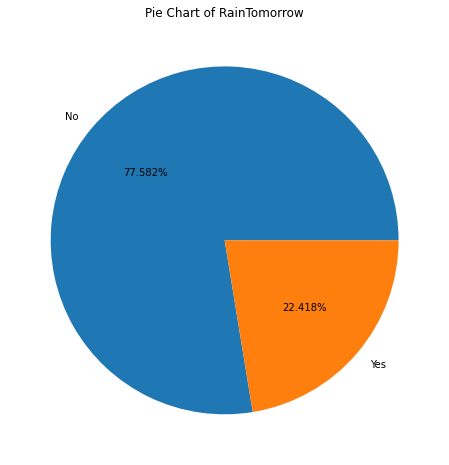

In [19]:
import matplotlib.pyplot as plt

# plotting piechart
classlabels=["No","Yes"]
plt.figure(figsize=(14,8))
plt.pie(percentage,labels=classlabels,autopct='%1.3f%%')
plt.title("Pie Chart of RainTomorrow")
plt.show()

###### Pie Chart for Rain Today


In [20]:
## Percentage for Pie Chart
percentage=data['RainToday'].value_counts(normalize=True)*100

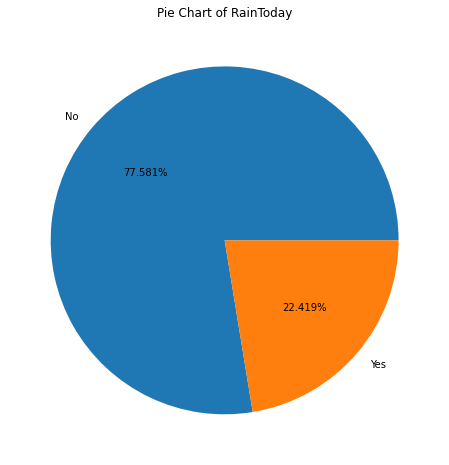

In [21]:
# plotting piechart
classlabels=["No","Yes"]
plt.figure(figsize=(14,8))
plt.pie(percentage,labels=classlabels,autopct='%1.3f%%')
plt.title("Pie Chart of RainToday")
plt.show()

We can see that distribution of RainTomorrow and RainToday is almost same

### Let's extract year, day and month from date

In [22]:
data['Date'] = pd.to_datetime(data['Date'])

In [23]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [24]:
data.drop('Date', axis=1, inplace=True)

In [25]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Impute Null Values

In [26]:
cat_data = data.select_dtypes('object')
num_data = data.select_dtypes(exclude='object')

###### Fix categorical null values

In [27]:
#fixing null values of categorical columns
for i in cat_data.columns:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [28]:
cat_data.isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

###### Fix numerical null values

In [29]:
#fixing null values of numerical columns
for i in num_data.columns:
    data[i].fillna(data[i].median(), inplace=True)

In [30]:
num_data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [31]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

### Encoding

In [32]:
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})    # converting categorical var to numerical using map function 
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [33]:
# to get the list of variable for catigorcal
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [34]:
#applying lable encoder for pre processing

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])

In [35]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


### Outliers

In [36]:
a1 = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed',
      'WindSpeed9am', 'WindSpeed3pm']
a2 = ['Pressure9am', 'Pressure3pm', 'Rainfall'] 
a4 = []
a3 = ['Humidity9am','Humidity3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']

<AxesSubplot:>

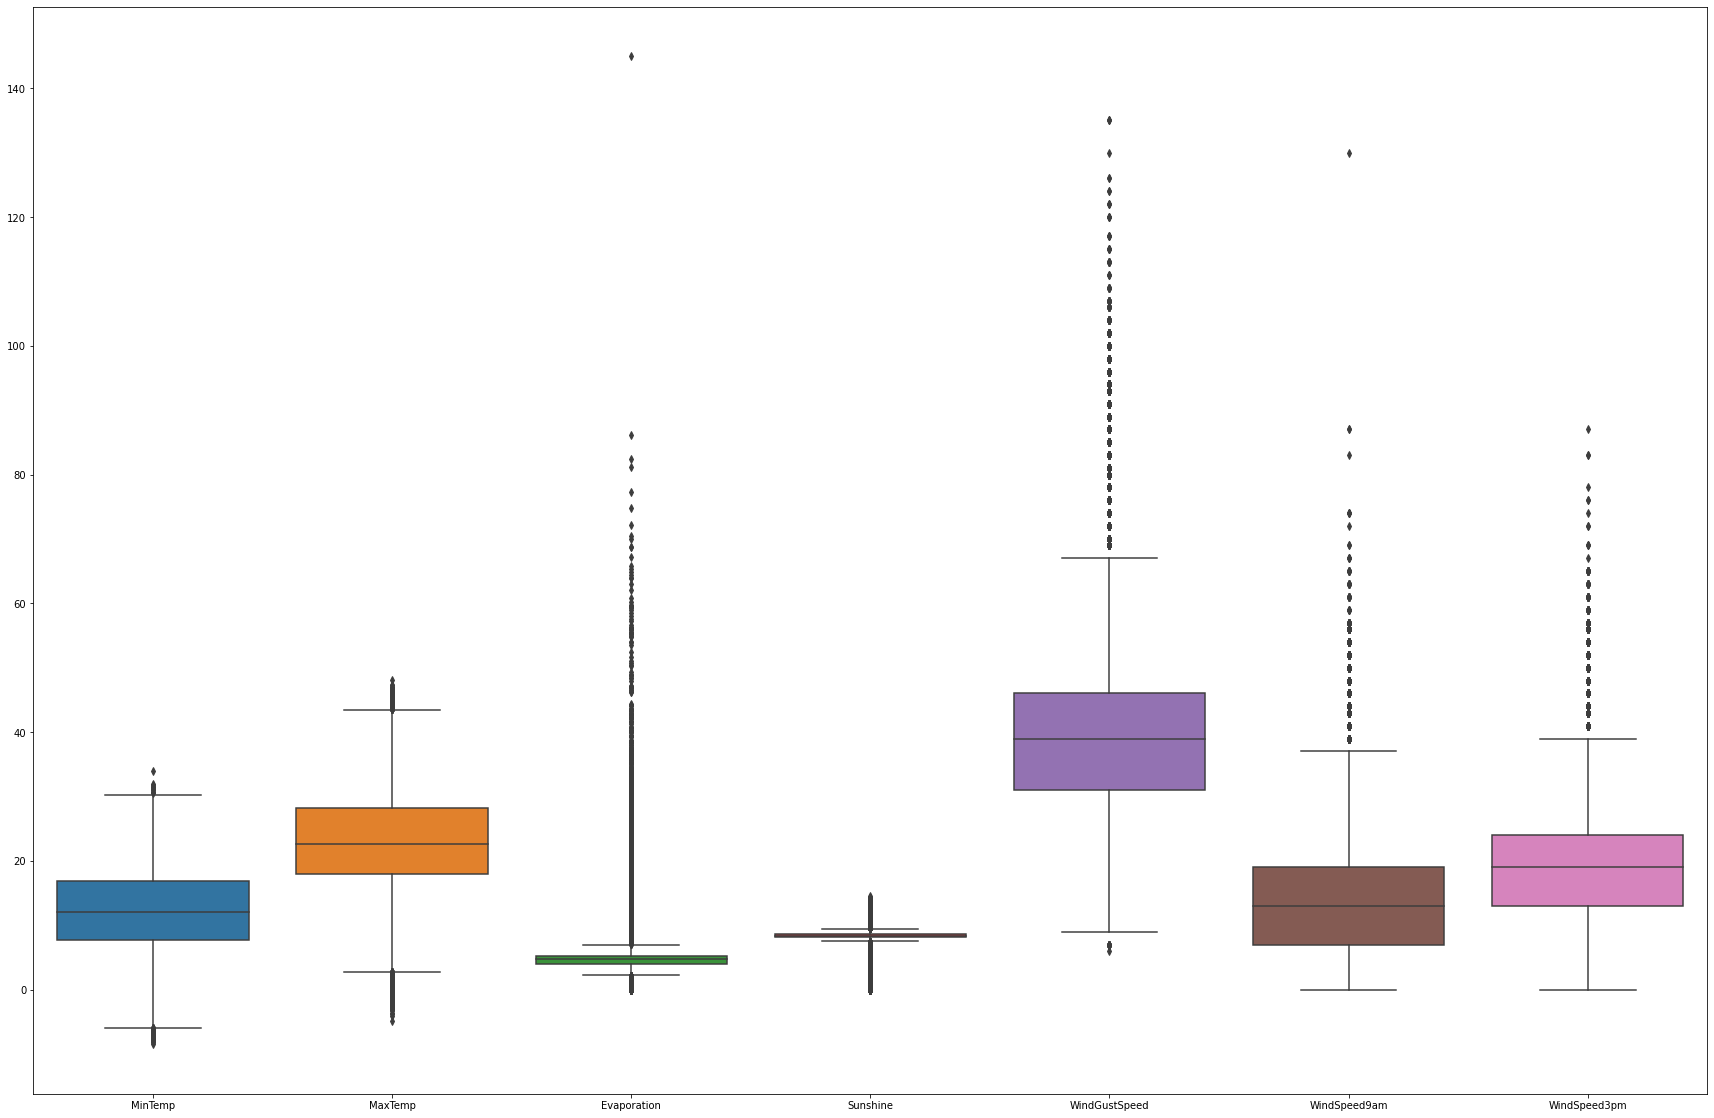

In [37]:
import seaborn as sns

plt.subplots(figsize=(30, 20))
sns.boxplot(data=data[a1])

<AxesSubplot:>

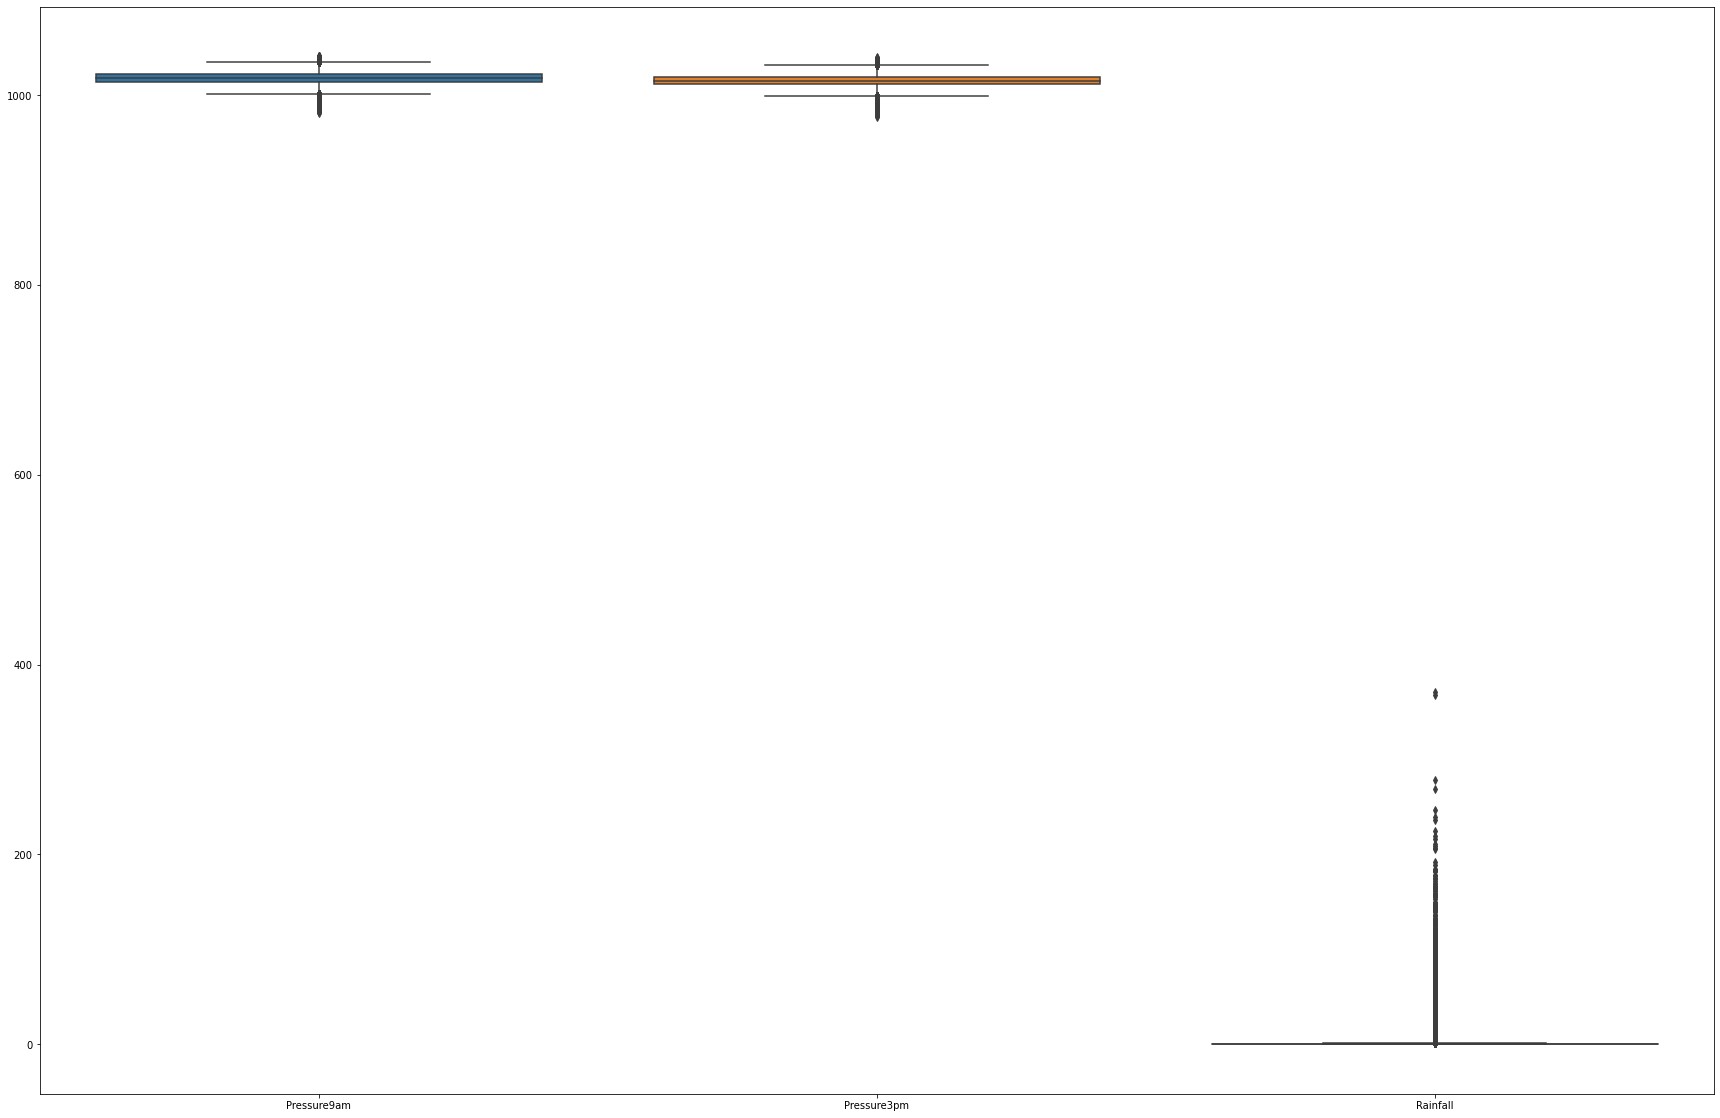

In [38]:
plt.subplots(figsize=(30, 20))
sns.boxplot(data=data[a2])

<AxesSubplot:>

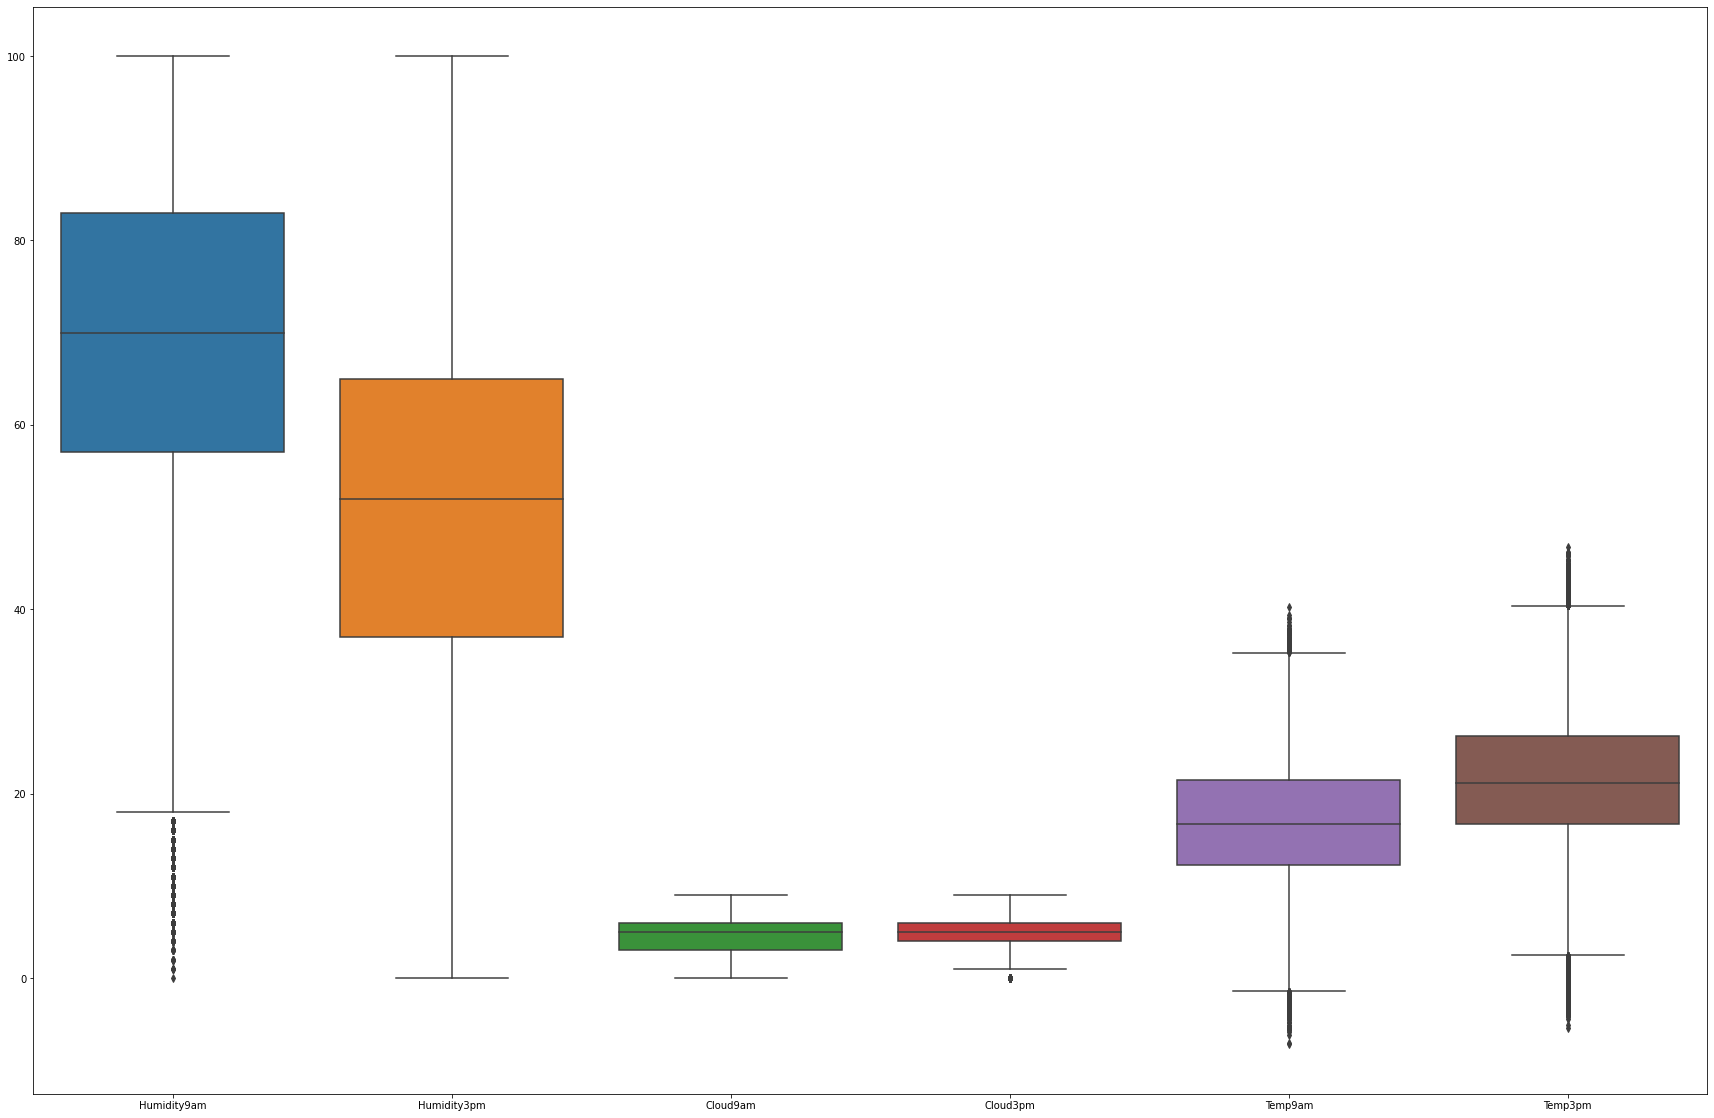

In [39]:
plt.subplots(figsize=(30, 20))
sns.boxplot(data=data[a3])

In [44]:
data_clean = data.copy()

In [45]:
data_clean.shape

(145460, 25)

In [46]:
def remove_out(data_clean, num_cols, lbv=0.25, hbv=0.75):
    Q1 = data_clean[num_cols].quantile(lbv)
    Q3 = data_clean[num_cols].quantile(hbv)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    hb = Q3+1.5*IQR
    for i in num_cols:
        data_clean = data_clean[(data_clean[i]>=lb[i]) & (data_clean[i]<=hb[i])]
    return data_clean

In [47]:
cols = ['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'Evaporation', 'Sunshine']

In [48]:
data_clean = remove_out(data_clean, cols, lbv=0.10, hbv=0.90)
data_clean.shape

(138416, 25)

### Split data

In [50]:
X = data_clean.drop(['RainTomorrow'], axis=1)

Y = data_clean['RainTomorrow']

In [51]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, Y = sm.fit_resample(X, Y)

In [52]:
Y.value_counts()

0    110369
1    110369
Name: RainTomorrow, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [54]:
X_train.shape, X_test.shape

((176590, 24), (44148, 24))

### Scaling

In [55]:
cols = list(num_data.columns)

In [56]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [57]:
X_train[cols] = pt.fit_transform(X_train[cols])

In [58]:
X_test[cols] = pt.transform(X_test[cols])

### Model Building

### Running XGBoost

In [59]:
from xgboost import XGBClassifier

model_XGB=XGBClassifier( learning_rate =0.1,
 n_estimators=120,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.9)

# fit the model on the data and predict the values

model_XGB.fit(X_train,Y_train)

Y_pred=model_XGB.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(Y_test , Y_pred))
print()
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[20379  1629]
 [ 2944 19196]]

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22008
           1       0.92      0.87      0.89     22140

    accuracy                           0.90     44148
   macro avg       0.90      0.90      0.90     44148
weighted avg       0.90      0.90      0.90     44148

0.8964165987134185


### Running Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=300,
                                         random_state=10)

# fit the model on the data and predict the values

model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(Y_test , Y_pred))
print()
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[20389  1619]
 [ 3016 19124]]

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22008
           1       0.92      0.86      0.89     22140

    accuracy                           0.90     44148
   macro avg       0.90      0.90      0.89     44148
weighted avg       0.90      0.90      0.89     44148

0.8950122315846697


### Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion = 'gini',random_state=10,splitter='best')

# fit the model on the data and predict the values

model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=10)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(Y_test , Y_pred))
print()
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[20389  1619]
 [ 3016 19124]]

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22008
           1       0.92      0.86      0.89     22140

    accuracy                           0.90     44148
   macro avg       0.90      0.90      0.89     44148
weighted avg       0.90      0.90      0.89     44148

0.8950122315846697


### Running Adaboost Classifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                                         random_state=10)

# fit the model on the data and predict the values

model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(Y_test , Y_pred))
print()
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[19777  2231]
 [ 1700 20440]]

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     22008
           1       0.90      0.92      0.91     22140

    accuracy                           0.91     44148
   macro avg       0.91      0.91      0.91     44148
weighted avg       0.91      0.91      0.91     44148

0.9109585938207846


### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

modelRF=RandomForestClassifier(n_estimators=500,
                                         random_state=10,bootstrap=True,
                                         n_jobs=-1)

# fit the model on the data and predict the values

modelRF.fit(X_train,Y_train)

Y_pred=modelRF.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(Y_test , Y_pred))
print()
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[20061  1947]
 [ 1847 20293]]

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     22008
           1       0.91      0.92      0.91     22140

    accuracy                           0.91     44148
   macro avg       0.91      0.91      0.91     44148
weighted avg       0.91      0.91      0.91     44148

0.9140617921536649


### Extra Trees Classifiers

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

model_EXT=ExtraTreesClassifier(n_estimators=300,
                                         random_state=10,bootstrap=True,n_jobs=1)

# fit the model on the data and predict the values

model_EXT.fit(X_train,Y_train)

Y_pred=model_EXT.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(Y_test , Y_pred))
print()
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[19665  2343]
 [ 1519 20621]]

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     22008
           1       0.90      0.93      0.91     22140

    accuracy                           0.91     44148
   macro avg       0.91      0.91      0.91     44148
weighted avg       0.91      0.91      0.91     44148

0.9125215185285857


out of all the models random forest classifie is giving best accuracy so ww will go with random forest classifier